1) The mirror points $z_1$ and $z_2$ are computed using the fact that the $v_{||}$ is $0$ at the extremities. Setting the velocity to zero and after a few analytic and algebraic steps, one arrives at the following:
$$z = \pm L \sqrt{\frac{1}{\varepsilon}\left (\frac{E}{\mu B_0}-1\right)}$$

/var/folders/xq/6np0k8fs4tz9n8zx56mg1nkw0000gn/T/ipykernel_28476/3180067322.py:26: RuntimeWarning: divide by zero encountered in divide
  return 1 / (v_par)


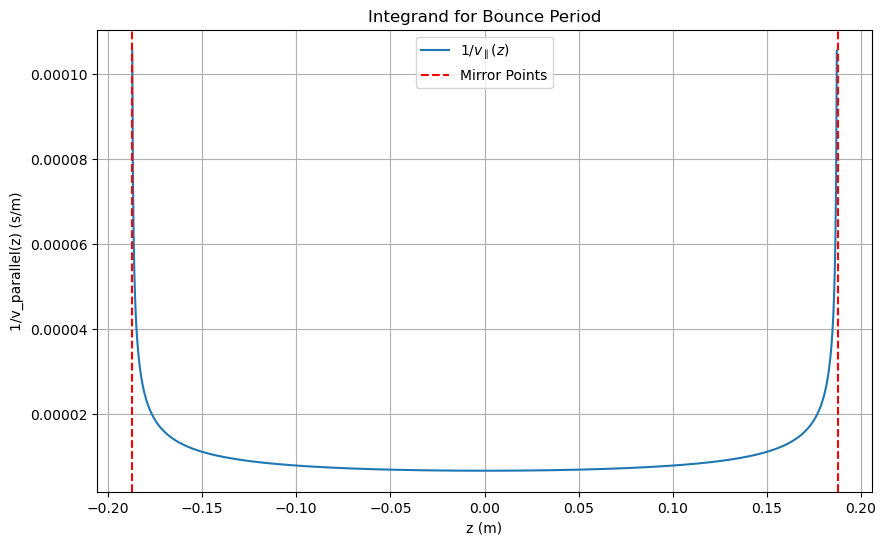

In [4]:
import numpy as np
import matplotlib.pyplot as plt

m = 9.11e-31
B0 = 0.1
epsilon = 4
L = 0.5
v_perp = 2e5
v_parallel_0 = 1.5e5

mu = 0.5 * m * v_perp**2 / B0

E = 0.5 * m * v_perp**2 + 0.5 * m * v_parallel_0**2

def B(z):
    return B0 * (1 + epsilon * (z**2 / L**2))

def v_parallel(z):
    return np.sqrt(2 * (E - mu * B(z)) / m)

z_mirror = L * np.sqrt((E - mu * B0) / (mu * B0 * epsilon))
z1, z2 = -z_mirror, z_mirror

def integrand(z):
    v_par = v_parallel(z)
    return 1 / (v_par) 

z_values = np.linspace(z1, z2, 1000)
integrand_values = integrand(z_values)

plt.figure(figsize=(10, 6))
plt.plot(z_values, integrand_values, label=r'$1/v_{\parallel}(z)$')
plt.axvline(x=z1, color='r', linestyle='--', label='Mirror Points')
plt.axvline(x=z2, color='r', linestyle='--')
plt.title('Integrand for Bounce Period')
plt.xlabel('z (m)')
plt.ylabel('1/v_parallel(z) (s/m)')
plt.legend()
plt.grid(True)
plt.show()


The mirror points $z1$ and $z2$ are located at ±0.1875 meters, respectively. These points are where the charged particles reverse their direction due to the increasing magnetic field strength. The integrand spikes near the mirror points, indicating that the parallel velocity approaches 0 as particle decelerates to change direction. Bounce period is approximately $7.85*10^{-6}$.

2. compile and run the file bouncePeriodCompute.cpp. This will output the iterations and values computed in those iterations in the shell and also to a file named bouncePeriodCompute.txt. For my run here is the output:

Iteration 0, Trap: 2.764188422e-06
Iteration 1, Trap: 3.107709364e-06
Iteration 0, Simpson: 2.928710987e-06
Iteration 1, Simpson: 3.222216345e-06

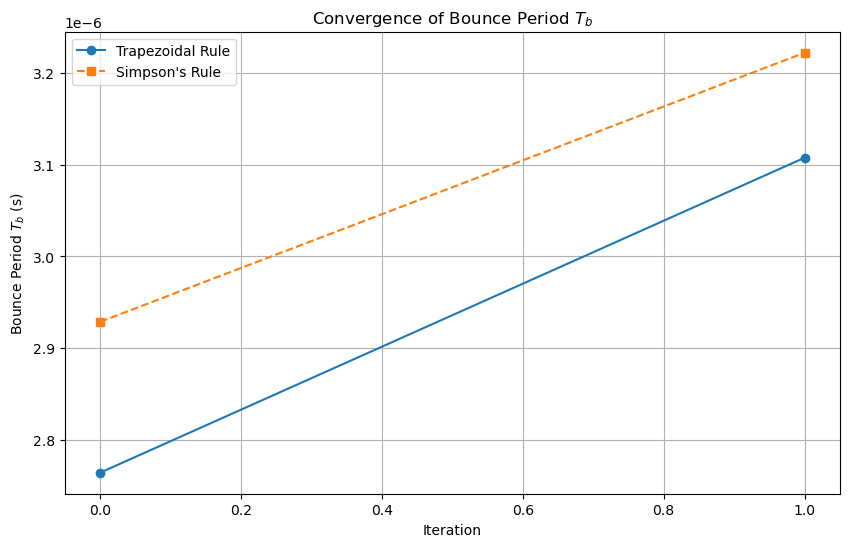

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from the file
file_path = 'bouncePeriodCompute.txt'
iterations_trap = []
Tb_values_trap = []
iterations_simp = []
Tb_values_simp = []

with open(file_path, 'r') as file:
    for line in file:
        if 'Trap' in line:
            parts = line.split(',')
            iteration = int(parts[0].split(' ')[1])
            Tb = float(parts[1].split(':')[1].strip())
            iterations_trap.append(iteration)
            Tb_values_trap.append(Tb)
        elif 'Simpson' in line:
            parts = line.split(',')
            iteration = int(parts[0].split(' ')[1])
            Tb = float(parts[1].split(':')[1].strip())
            iterations_simp.append(iteration)
            Tb_values_simp.append(Tb)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(iterations_trap, Tb_values_trap, marker='o', linestyle='-', label='Trapezoidal Rule')
plt.plot(iterations_simp, Tb_values_simp, marker='s', linestyle='--', label="Simpson's Rule")
plt.title('Convergence of Bounce Period $T_b$')
plt.xlabel('Iteration')
plt.ylabel('Bounce Period $T_b$ (s)')
plt.legend()
plt.grid(True)
plt.show()


3. Simpson's rule is much more accurate and converges faster than Trapezoidal rule. Although, we can't see it in this scenario, it can be rightly demonstrated by decreasing the error tolerance for much more accurate results.

4. Calculate the relative error between results obtained with $N$ and $N/2$. If the relative error is within an acceptable tolerance it indicates convergence. Use different numerical methods and compare their results. If different methods yield similar results, it increases confidence in the correctness of the solution. Plot the integrand and the computed integral values for different $N$. Visual inspection can sometimes reveal issues like oscillations or non-convergence. Ensure that the integrand does not have any singularities or discontinuities within the integration range.

Compile and run the doubleConv.cpp to see if our integral achieves convergence. Here I set the tolerance to E-06. Turns out, there is not a good convergence. This signals we need to increase $N$. Here is the output that I got when I ran.

Result with N = 100000: 3.915445693e-06
Result with 2N = 200000: 3.918827184e-06
Relative Error: 0.0008628835538
Convergence not achieved. Increase N further.

## Bonus

compile and run the program mirrorRatioConvergence.cpp before running the below python snippet. You will get a similar result like the following


Epsilon = 1, Tb = 2.617993878e-06
Epsilon = 2, Tb = 2.776801836e-06
Epsilon = 3, Tb = 3.022998941e-06
Epsilon = 4, Tb = 3.915445693e-06
Epsilon = 5, Tb = 3.510837676e-06
Epsilon = 6, Tb = 3.197657192e-06
Epsilon = 7, Tb = 2.965282076e-06
Epsilon = 8, Tb = 2.775879026e-06
Epsilon = 9, Tb = 2.617231658e-06
Epsilon = 10, Tb = 2.476488317e-06

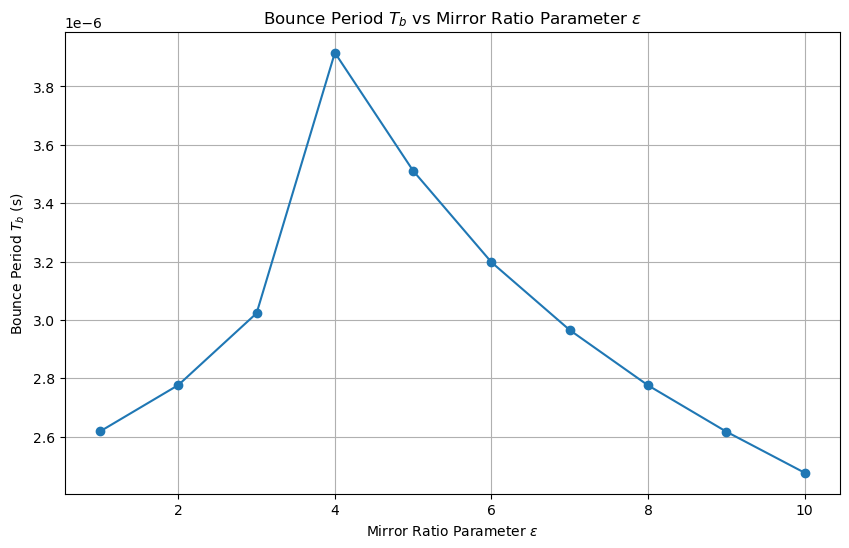

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from the file
file_path = 'mirrorRatioConvergence.txt'
epsilon_values = []
Tb_values = []

with open(file_path, 'r') as file:
    for line in file:
        if line.startswith('Epsilon'):
            parts = line.split(',')
            epsilon = float(parts[0].split('=')[1].strip())
            Tb = float(parts[1].split('=')[1].strip())
            epsilon_values.append(epsilon)
            Tb_values.append(Tb)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, Tb_values, marker='o', linestyle='-')
plt.title('Bounce Period $T_b$ vs Mirror Ratio Parameter $\\epsilon$')
plt.xlabel('Mirror Ratio Parameter $\\epsilon$')
plt.ylabel('Bounce Period $T_b$ (s)')
plt.grid(True)
plt.show()


Now with a $z^4$ magnetic field, run the crazyMagFieldFunc.cpp and then execute the below python snippet. The code will tkae a while to run as the error tolerance is set to E-07 instead of E-03. If it runs successfully, this is the kind of output you would witness

Iteration 0, Trap: 2.540311658e-06
Iteration 1, Trap: 2.538134335e-06
Iteration 0, Simpson: 2.537511749e-06
Iteration 1, Simpson: 2.537408561e-06

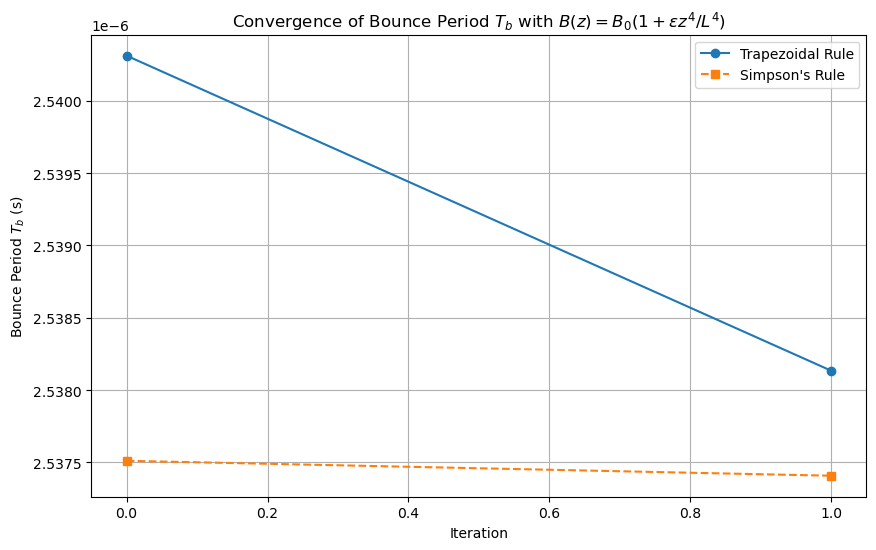

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from the file
file_path = 'crazyMagFieldFunc.txt'
iterations_trap = []
Tb_values_trap = []
iterations_simp = []
Tb_values_simp = []

with open(file_path, 'r') as file:
    for line in file:
        if 'Trap' in line:
            parts = line.split(',')
            iteration = int(parts[0].split(' ')[1])
            Tb = float(parts[1].split(':')[1].strip())
            iterations_trap.append(iteration)
            Tb_values_trap.append(Tb)
        elif 'Simpson' in line:
            parts = line.split(',')
            iteration = int(parts[0].split(' ')[1])
            Tb = float(parts[1].split(':')[1].strip())
            iterations_simp.append(iteration)
            Tb_values_simp.append(Tb)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(iterations_trap, Tb_values_trap, marker='o', linestyle='-', label='Trapezoidal Rule')
plt.plot(iterations_simp, Tb_values_simp, marker='s', linestyle='--', label="Simpson's Rule")
plt.title('Convergence of Bounce Period $T_b$ with $B(z) = B_0(1 + \\epsilon z^4/L^4)$')
plt.xlabel('Iteration')
plt.ylabel('Bounce Period $T_b$ (s)')
plt.legend()
plt.grid(True)
plt.show()
